In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import make_scorer
import math
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import statistics
from tqdm import tqdm

important_features = ['X','Y','tile','Height',
                     '2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_GRD', '2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0011_OPN_asc', '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0002_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0011_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0008_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_OPN', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0012_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0006_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0007_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0002_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0001_DIL', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0005_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0005_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_GRN_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0002_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0001_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0012_OPN', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0003_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_ERO_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCW_STM_B0012_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0005_DIL_asc', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0007_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0006_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0005_OPN_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0007_DIL', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0004_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0013_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_GRN_STM_B0004_GRD', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_OPN_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0004_DIL', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0012_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW2_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0009_DIL', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0006_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0013_OPN', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0003_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_TCW_STM_B0007_GRD', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0011_CLS_desc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0011_GRD', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0004_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0012_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0008_GRD_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0001_CLS', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0003_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0003_BHT', '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0003_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_CLS', '2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0011_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0009_ERO_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0007_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0013_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_OPN', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0001_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0004_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0001_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_OPN_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0007_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0008_ERO']



file = 'C:/Users/egnke/PythonCode/Met_Eireann_git/Ireland_building_heights/Modelling/DataSetCreation/building_height_sample_asc.csv'
data = pd.read_csv(file)
data = data[important_features]
print(data.shape)
data.head()

(108405, 78)


,X,Y,tile,Height,2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_GRD,2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_ERO,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0011_OPN_asc,2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0002_CLS,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_DIL_asc,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_GRD_asc,...,2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0004_ERO,2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_ERO,2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_GRD_asc,2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_OPN,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0001_CLS_asc,2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0004_ERO,2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0001_ERO,2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_OPN_asc,2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0007_GRD_asc,2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0008_ERO
0,2169,2555,X0002_Y0002,2,871,4532,637,1399,-15294,2960,...,1562,108,6968,139,-16088,3262,1179,-4890,9657,1716
1,1801,2273,X0002_Y0002,2,1666,7551,436,3366,-11690,6530,...,1183,45,10847,85,-15535,2506,1720,-9474,6407,2011
2,2146,2572,X0002_Y0002,2,6869,1659,599,1960,-15671,2827,...,1318,144,5829,187,-17193,2245,873,-7623,4714,1378
3,2153,2572,X0002_Y0002,2,4207,4321,514,1795,-16108,1520,...,1315,99,2162,240,-17150,2321,1383,-6802,4239,1602
4,2129,2522,X0002_Y0002,2,4905,3122,511,1678,-14739,1802,...,1287,135,3075,380,-15910,2326,1286,-5849,5496,1652


Text(0.5, 1.0, 'Histogram of Building Heights')

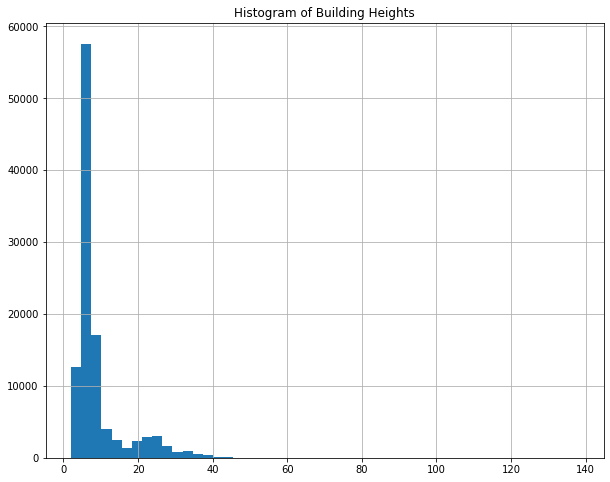

In [8]:
plt.figure(figsize=(10,8))
data.Height.hist(bins=50)
plt.title('Histogram of Building Heights')

In [9]:
def feature_engineering(df):
    
    ascending_cols, descending_cols, difference_cols = get_columns(df)
    
    for i in range(len(ascending_cols)):
        df[difference_cols[i]] = df[ascending_cols[i]] - df[descending_cols[i]]
        
    return df


def get_columns(df):
    
    cols = df.columns
    
    ascending_cols = list(filter(lambda k: 'asc' in k, cols))
    
    descending_cols = list(filter(lambda k: 'desc' in k, cols))
    
    test1 = [col.replace('asc','') for col in ascending_cols]
    test2 = [col.replace('desc','') for col in descending_cols]
    
    difference_cols = [col.replace('asc','difference') for col in ascending_cols]
    return ascending_cols, descending_cols, difference_cols

    
#data = feature_engineering(data)
#print(data.shape)
#data.head()

In [10]:
def replace_value_with_frequency_of_occurance(array):

    unique_elements, counts_elements = np.unique(array, return_counts=True)
    mapping = dict(zip(unique_elements, counts_elements))
    
    return np.vectorize(mapping.get)(array)


def weighted_root_mean_squared_error(y_actual, y_pred):
    weights = replace_value_with_frequency_of_occurance(y_actual)
    return np.sqrt(np.sum(weights * ((y_pred - y_actual) ** 2)) / np.sum(weights))



def root_mean_squared_error(y_actual, y_pred):
    MSE = np.square(np.subtract(y_actual,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE


def cross_val_model(model, X, y, stratified):
    
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    
    rmse = []
    weighted_rmse = []
    for train_index, test_index in tqdm(kfold.split(X, stratified)):
   
        X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
        
        preds = model.fit(X_train, y_train).predict(X_test)
        rmse.append(root_mean_squared_error(y_test, preds))
        weighted_rmse.append(weighted_root_mean_squared_error(y_test, preds))
        
    print(rmse)
    print('Average RMSE: ' + str(statistics.mean(rmse)) + ' STD: ' + str(statistics.stdev(rmse)))
    
    print('/n')
    print(weighted_rmse)
    print('Average weighted RMSE: ' + str(statistics.mean(weighted_rmse)) + ' STD: ' + str(statistics.stdev(weighted_rmse)))
    
    

bins     = np.arange(1,41)
bins[-1] = data.Height.max()
data['binned'] = pd.cut(data['Height'], bins)
data['stratified_labels'] = LabelEncoder().fit_transform(data['binned'])


y = data['Height']
stratified = data['stratified_labels']
X = data.drop(['X','Y','tile','Height','binned','stratified_labels'], axis=1)


linear_xgb  = XGBRegressor()
poisson_xgb = XGBRegressor(objective='count:poisson')

cross_val_model(linear_xgb, X, y, stratified)
cross_val_model(poisson_xgb, X, y, stratified)

10it [02:51, 17.19s/it]
0it [00:00, ?it/s]

[3.1659460377119535, 3.6687356239186806, 3.2420254812757467, 3.3631258756768747, 3.3017393641883923, 3.1181496551397134, 3.2251444898245327, 3.1852116542970994, 3.3492095954927916, 3.3241385111303834]
Average RMSE: 3.294342628865617 STD: 0.15485434902448103
/n
[2.3062499429067853, 2.280897262873457, 2.1363398006121526, 2.3907979088069085, 2.366946492979689, 2.1734328799914353, 2.2489369395039, 2.300806126997112, 2.3968592216885587, 2.3148073183986044]
Average weighted RMSE: 2.2916073894758604 STD: 0.08656318092527647


10it [02:59, 17.91s/it]

[3.3212515331044137, 3.834590897450273, 3.4470941414389906, 3.449587080316389, 3.4240236398239685, 3.272795349671636, 3.3684773895258813, 3.3459289290628043, 3.434090783446874, 3.448797130095556]
Average RMSE: 3.4346636873936784 STD: 0.1534602551080636
/n
[2.3248736510617083, 2.3373376509349235, 2.216767853230093, 2.407251254071324, 2.4152824828841997, 2.2097652471210902, 2.309604359176369, 2.34156792589523, 2.3950175165023957, 2.3033316955615204]
Average weighted RMSE: 2.3260799636438856 STD: 0.07144034163528368
